<div style = 'background-color: #6482AD; text-align:center; padding: 10px; color:#F5EDED'>
    <h1>Gender Classification</h1>
    <h2><a href = 'https://www.linkedin.com/in/ahmedsharaf9/' style = "text-decoration: none; color: #F5EDED">Eng: Ahmed Sharaf</a></h2>
</div>   </ul>
</div>

<div style = 'background-color: #6482AD; text-align:center; padding: 10px; color:#F5EDED'>
    <h2>About Data</h2>
</div>

<div>    
<img src="https://aboutenglishlanguage.com/wp-content/uploads/2022/05/face-parts-names.jpg" width = '1260' height = '200'>    
</div>

* #### This dataset contains 7 features and a label column.
* ###### long_hair - This column contains 0's and 1's where 1 is "long hair" and 0 is "not long hair".
* ###### forehead_width_cm - This column is in CM's. This is the width of the forehead.
* ###### forehead_height_cm - This is the height of the forehead and it's in Cm's.
* ###### nose_wide - This column contains 0's and 1's where 1 is "wide nose" and 0 is "not wide nose".
* ###### nose_long - This column contains 0's and 1's where 1 is "Long nose" and 0 is "not long nose".
* ###### lips_thin - This column contains 0's and 1's where 1 represents the "thin lips" while 0 is "Not thin lips".
* ###### distance_nose_to_lip_long - This column contains 0's and 1's where 1 represents the "long distance between nose and lips" while 0 is "short distance between nose and lips".
* ###### gender - This is either "Male" or "Female".

<div style = 'background-color: #6482AD; text-align:center; padding: 10px; color:#F5EDED'>
    <h2>Import Libraries</h2>
</div>

In [1]:
# Libraries To Manipulate Data
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import BernoulliNB

# Model Evalutaion
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, roc_curve, roc_auc_score
from sklearn.model_selection import RandomizedSearchCV

# To Ignore Warning
import warnings
warnings.filterwarnings('ignore')


<div style = 'background-color: #6482AD; text-align:center; padding: 10px; color:#F5EDED'>
    <h2>Import Data</h2>
</div>

In [2]:
df = pd.read_csv('gender_classification_v7.csv')

In [3]:
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


<div style = 'background-color: #6482AD; text-align:center; padding: 10px; color:#F5EDED'>
    <h2>EDA</h2>
</div>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [5]:
df.isnull().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

In [6]:
df.duplicated().sum()

1768

In [7]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [8]:
df.shape

(3233, 8)

In [9]:
# Split Categorical Features And Numerical Features
num_feat = [col for col in df.columns if df[col].nunique() > 2]
cat_feat = list(set(df.columns) - set(num_feat))

In [10]:
cat_feat

['lips_thin',
 'distance_nose_to_lip_long',
 'long_hair',
 'nose_long',
 'nose_wide',
 'gender']

In [11]:
num_feat

['forehead_width_cm', 'forehead_height_cm']

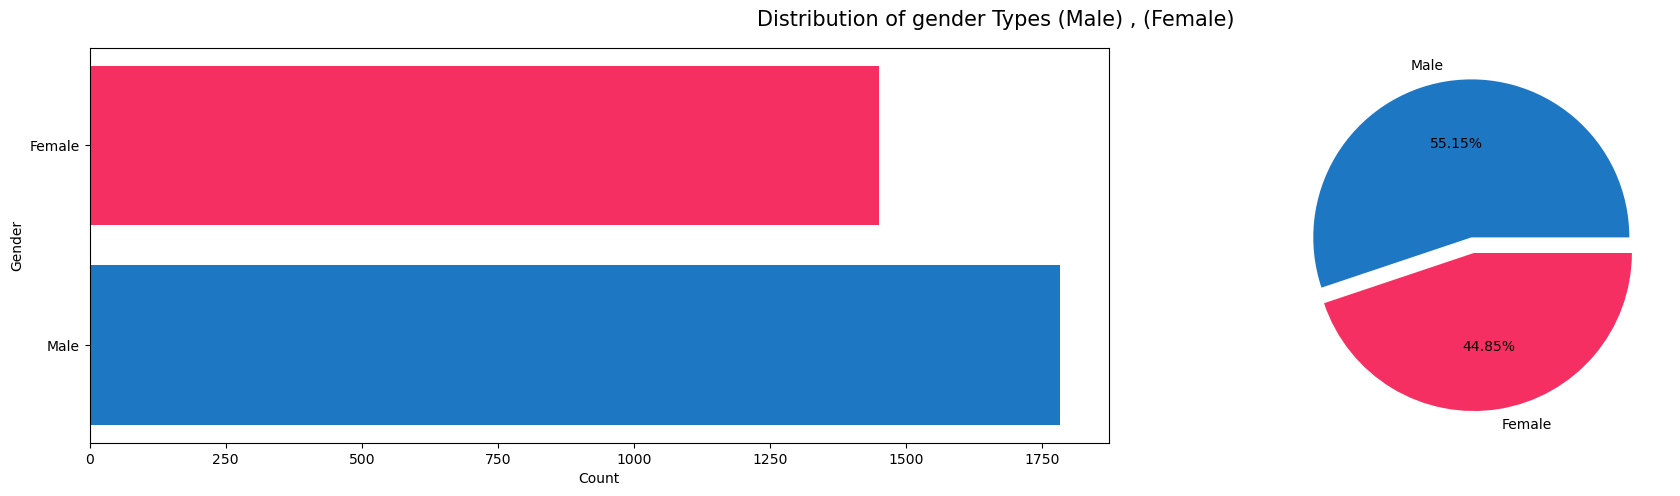

In [12]:
# Lets Visualize The Target

# FPrepare Counts Of Gender 
count_values = df['gender'].value_counts()
colors = ['#1D77C3', '#F62F63']

# Plot Bar Plot
plt.figure(figsize = (20, 5))
plt.subplot(1, 2, 1)
plt.barh(y = count_values.index, width=count_values.values, color = colors)
plt.xlabel('Count')
plt.ylabel('Gender')

# Plot Pie Plot
plt.subplot(1, 2, 2)
plt.pie(count_values.values, labels=count_values.index, colors = colors, autopct='%0.2f%%', explode=([0.05] * len(count_values.index)))

# Edit Some Properites Of Global Figure
plt.suptitle('Distribution of gender Types (Male) , (Female)', fontsize=15)
plt.tight_layout(pad=1)
plt.show()

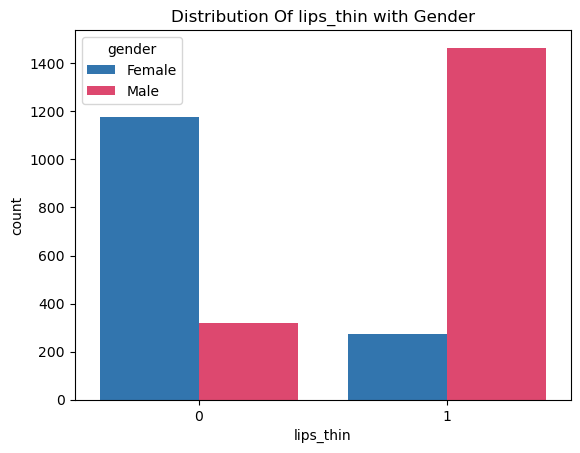

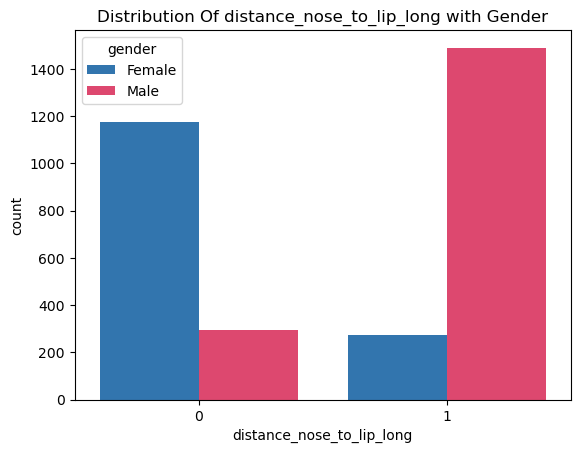

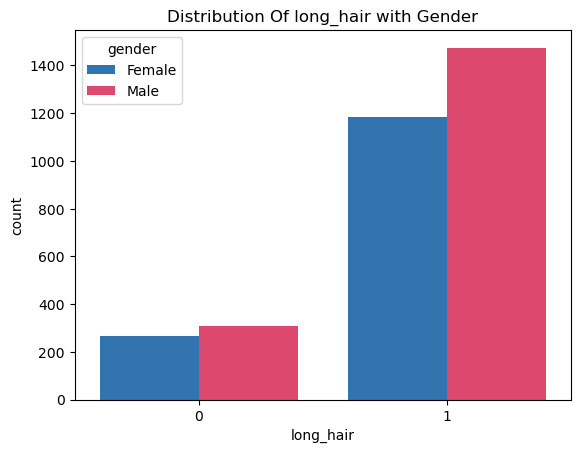

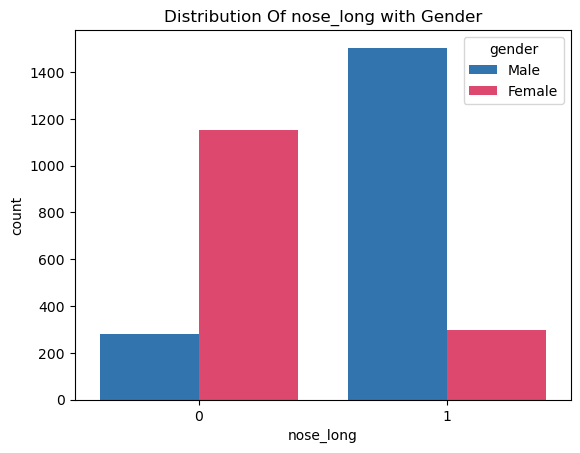

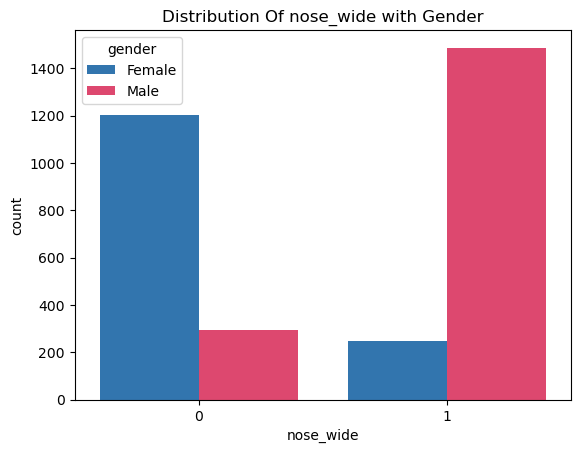

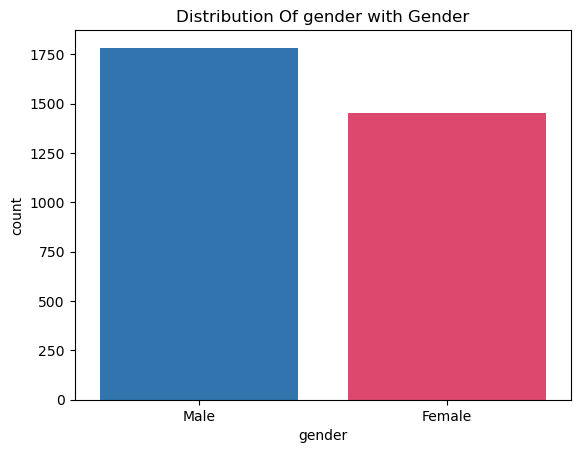

In [13]:
# Lets Plot Categorical Feature With Target Gender
for col in cat_feat:
    sns.countplot(data = df, x = col, hue = 'gender', palette=colors)
    plt.title(f'Distribution Of {col} with Gender')
    plt.show()

<div style = 'background-color: #6482AD; text-align:center; padding: 10px; color:#F5EDED'>
    <h2>Data Preprocessing</h2>
</div>

In [14]:
df['gender'] = df['gender'].map(lambda x : 0 if x == 'Male' else 1)

In [15]:
# lets build model and prepare data
X = df.drop(columns = 'gender', axis = 1)
y = df['gender']

# Train, Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

# Lets Standardize Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


<div style = 'background-color: #6482AD; text-align:center; padding: 10px; color:#F5EDED'>
    <h2>Build Models</h2>
</div>

Performance Of Logistic Regression Mdoel in Traning : 

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1270
           1       0.95      0.94      0.94       993

    accuracy                           0.95      2263
   macro avg       0.95      0.95      0.95      2263
weighted avg       0.95      0.95      0.95      2263




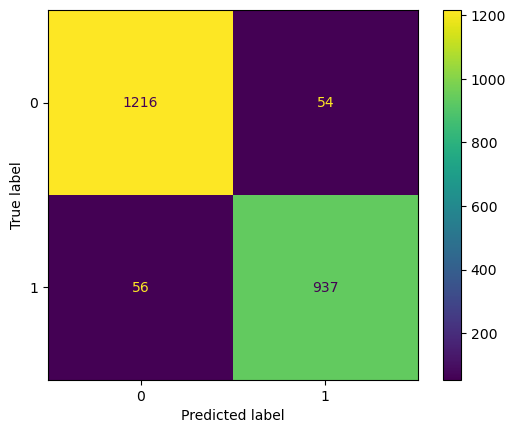


 ---------------------------------------------------------------------------------------------------- 

Performance Of Logistic Regression Mdoel in Test : 

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       513
           1       0.96      0.95      0.95       457

    accuracy                           0.96       970
   macro avg       0.96      0.96      0.96       970
weighted avg       0.96      0.96      0.96       970




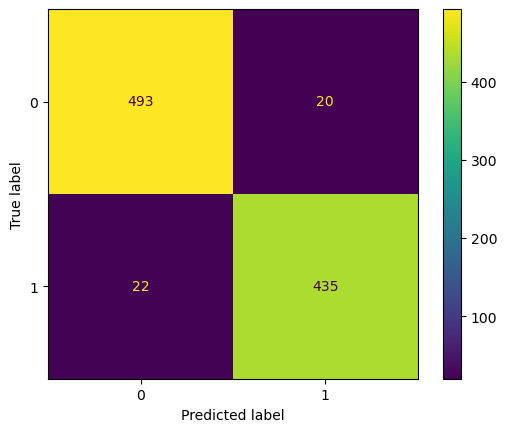


####################################################################################################
Performance Of SVC Mdoel in Traning : 

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1270
           1       0.95      0.97      0.96       993

    accuracy                           0.96      2263
   macro avg       0.96      0.96      0.96      2263
weighted avg       0.96      0.96      0.96      2263




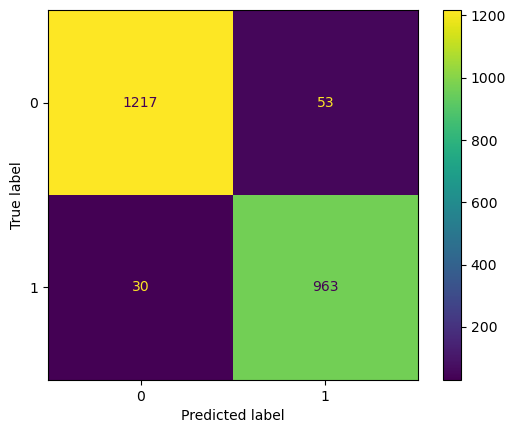


 ---------------------------------------------------------------------------------------------------- 

Performance Of SVC Mdoel in Test : 

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       513
           1       0.95      0.96      0.96       457

    accuracy                           0.96       970
   macro avg       0.96      0.96      0.96       970
weighted avg       0.96      0.96      0.96       970




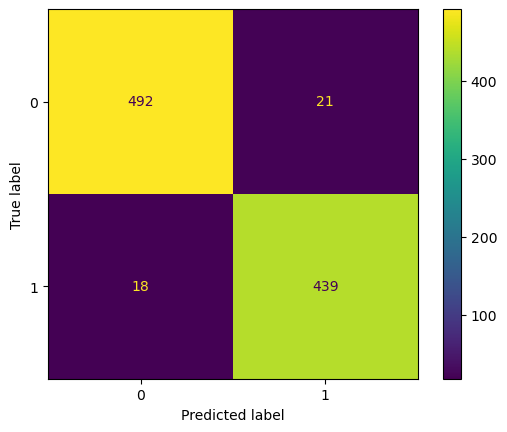


####################################################################################################
Performance Of Decision Tree Mdoel in Traning : 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1270
           1       1.00      0.99      1.00       993

    accuracy                           1.00      2263
   macro avg       1.00      1.00      1.00      2263
weighted avg       1.00      1.00      1.00      2263




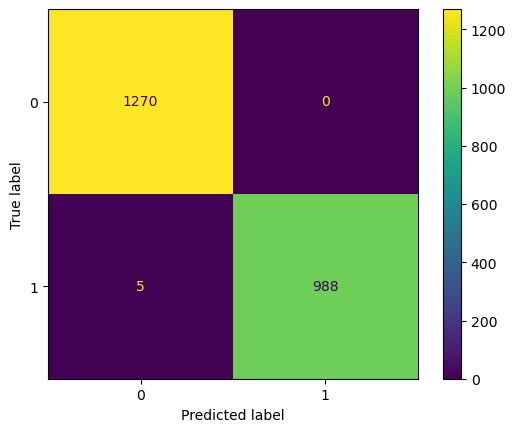


 ---------------------------------------------------------------------------------------------------- 

Performance Of Decision Tree Mdoel in Test : 

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       513
           1       0.94      0.93      0.93       457

    accuracy                           0.94       970
   macro avg       0.94      0.94      0.94       970
weighted avg       0.94      0.94      0.94       970




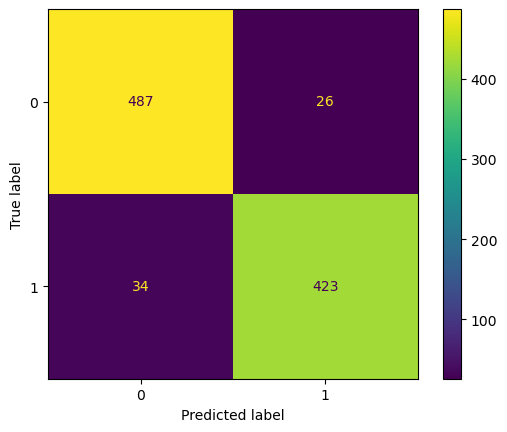


####################################################################################################
Performance Of Random Forest Mdoel in Traning : 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1270
           1       1.00      1.00      1.00       993

    accuracy                           1.00      2263
   macro avg       1.00      1.00      1.00      2263
weighted avg       1.00      1.00      1.00      2263




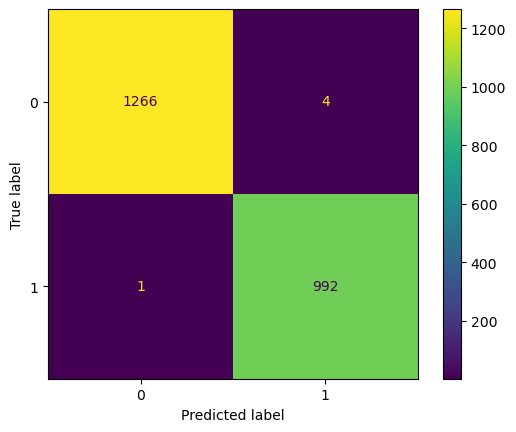


 ---------------------------------------------------------------------------------------------------- 

Performance Of Random Forest Mdoel in Test : 

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       513
           1       0.95      0.95      0.95       457

    accuracy                           0.95       970
   macro avg       0.95      0.95      0.95       970
weighted avg       0.95      0.95      0.95       970




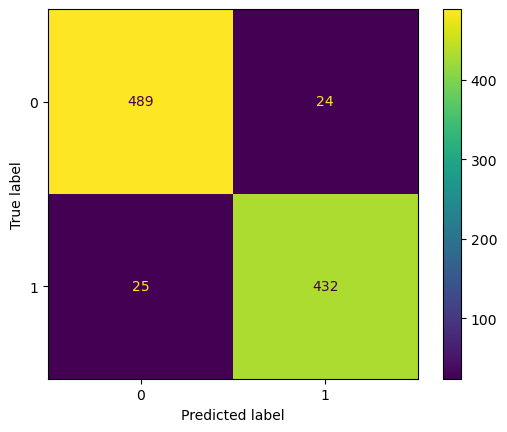


####################################################################################################
Performance Of AdaBoost Mdoel in Traning : 

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1270
           1       0.95      0.97      0.96       993

    accuracy                           0.97      2263
   macro avg       0.97      0.97      0.97      2263
weighted avg       0.97      0.97      0.97      2263




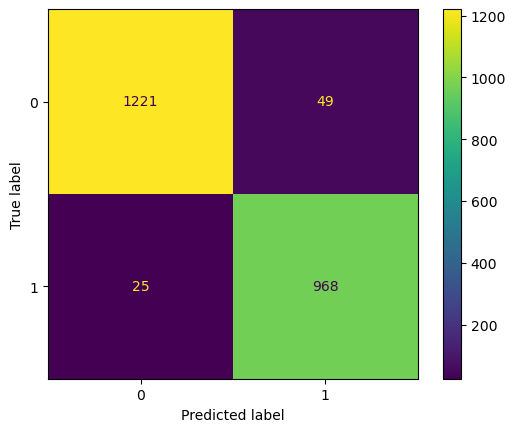


 ---------------------------------------------------------------------------------------------------- 

Performance Of AdaBoost Mdoel in Test : 

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       513
           1       0.95      0.97      0.96       457

    accuracy                           0.96       970
   macro avg       0.96      0.96      0.96       970
weighted avg       0.96      0.96      0.96       970




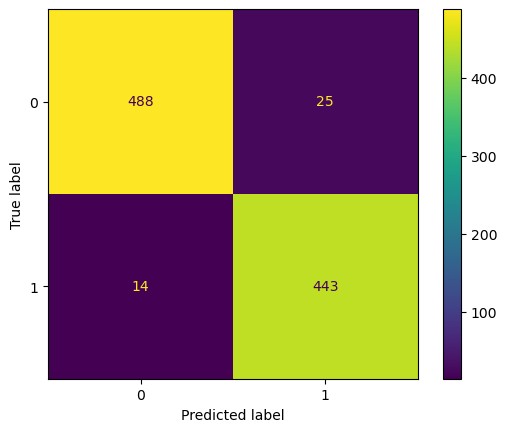


####################################################################################################
Performance Of GradientBoosting Mdoel in Traning : 

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1270
           1       0.96      0.98      0.97       993

    accuracy                           0.97      2263
   macro avg       0.97      0.97      0.97      2263
weighted avg       0.97      0.97      0.97      2263




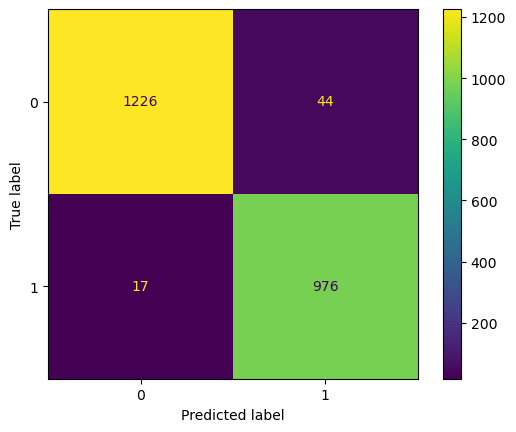


 ---------------------------------------------------------------------------------------------------- 

Performance Of GradientBoosting Mdoel in Test : 

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       513
           1       0.95      0.96      0.95       457

    accuracy                           0.96       970
   macro avg       0.96      0.96      0.96       970
weighted avg       0.96      0.96      0.96       970




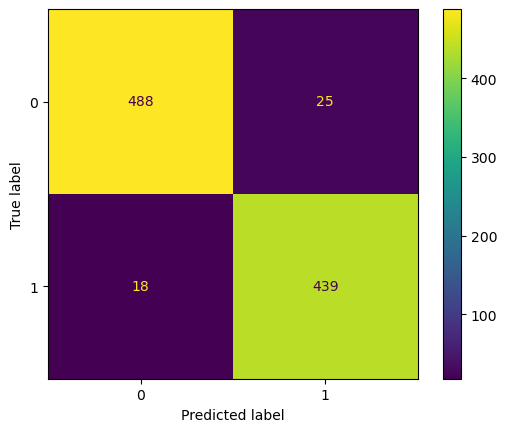


####################################################################################################
Performance Of XGBoost Mdoel in Traning : 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1270
           1       1.00      1.00      1.00       993

    accuracy                           1.00      2263
   macro avg       1.00      1.00      1.00      2263
weighted avg       1.00      1.00      1.00      2263




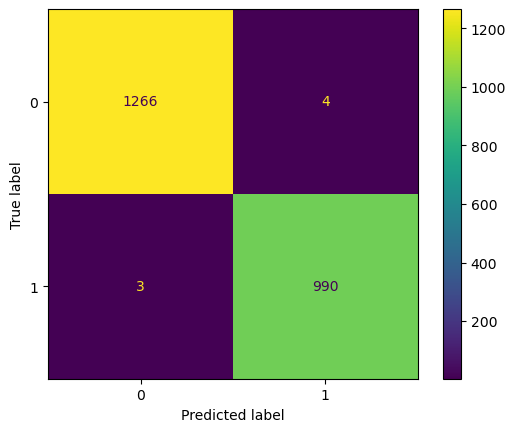


 ---------------------------------------------------------------------------------------------------- 

Performance Of XGBoost Mdoel in Test : 

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       513
           1       0.95      0.94      0.94       457

    accuracy                           0.95       970
   macro avg       0.95      0.95      0.95       970
weighted avg       0.95      0.95      0.95       970




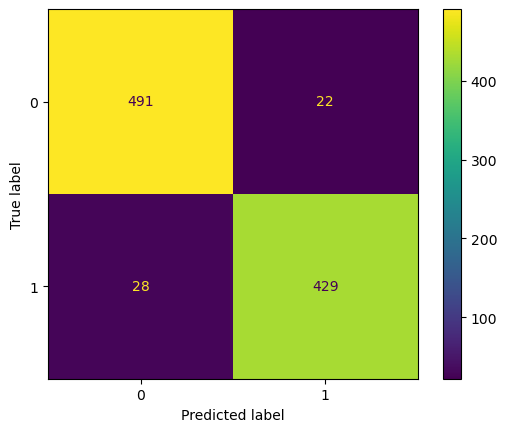


####################################################################################################
Performance Of BernoulliNB Mdoel in Traning : 

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1270
           1       0.94      0.93      0.94       993

    accuracy                           0.94      2263
   macro avg       0.94      0.94      0.94      2263
weighted avg       0.94      0.94      0.94      2263




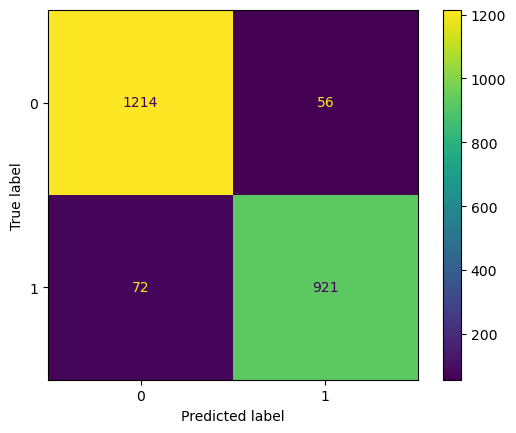


 ---------------------------------------------------------------------------------------------------- 

Performance Of BernoulliNB Mdoel in Test : 

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       513
           1       0.95      0.94      0.95       457

    accuracy                           0.95       970
   macro avg       0.95      0.95      0.95       970
weighted avg       0.95      0.95      0.95       970




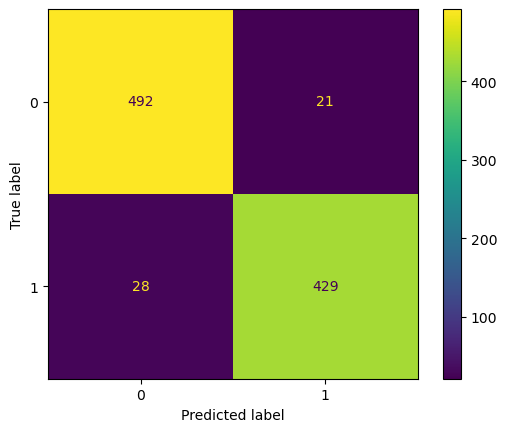


####################################################################################################


In [16]:
models = {
    'Logistic Regression': LogisticRegression(),
    'SVC': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'GradientBoosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(),
    'BernoulliNB': BernoulliNB()
}

results = pd.DataFrame(index = list(models), columns = ['Accuracy', 'AUC'])
for i in range(len(list(models))):
    # Get Model
    model = models[list(models)[i]]
    # Train Model
    model.fit(X_train, y_train)
    # Predict 
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Training
    print(f'Performance Of {list(models)[i]} Mdoel in Traning : ')
    print()
    print(classification_report(y_train, y_train_pred))
    print()
    confusion_matrix_train = confusion_matrix(y_train, y_train_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix_train)
    disp.plot()
    plt.show()
    print('\n','-'* 100, '\n')
    
    # Evaluate Training
    print(f'Performance Of {list(models)[i]} Mdoel in Test : ')
    print()
    print(classification_report(y_test, y_test_pred))
    print()
    confusion_matrix_test = confusion_matrix(y_test, y_test_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix_test)
    disp.plot()
    plt.show()
    
    # Save Accuracy And AUC
    accracy = accuracy_score(y_test, y_test_pred)
    auc = roc_auc_score(y_test, y_test_pred)
    results.loc[list(models)[i]] = [accracy, auc]
    
    print()
    print('#' * 100)

In [17]:
results = results.sort_values(by = ['AUC', 'Accuracy'], ascending=True)
results

,Accuracy,AUC
Decision Tree,0.938144,0.93746
XGBoost,0.948454,0.947923
BernoulliNB,0.949485,0.948898
Random Forest,0.949485,0.949256
GradientBoosting,0.95567,0.95594
Logistic Regression,0.956701,0.956437
SVC,0.959794,0.959839
AdaBoost,0.959794,0.960316


Text(0.5, 0, 'AUC')

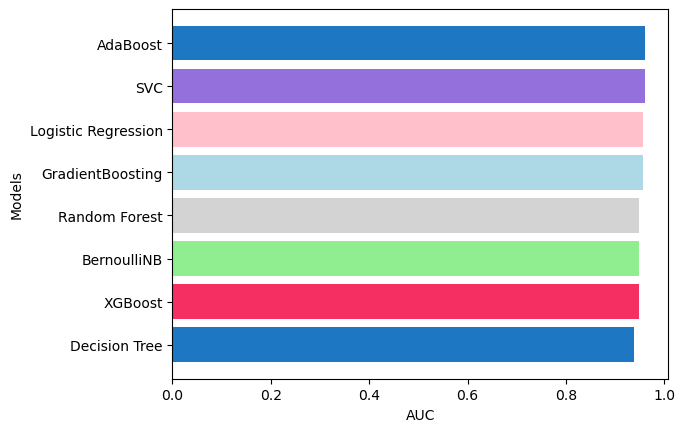

In [18]:
plt.barh(y = results.index, width = results['AUC'].values, color=['#1D77C3', '#F62F63', 'lightgreen','lightgray','lightblue', 'pink','mediumpurple'])
plt.ylabel('Models')
plt.xlabel('AUC')


<div style = 'background-color: #6482AD; text-align:center; padding: 10px; color:#F5EDED'>
    <h2>Hyperparameters Tuning</h2>
</div>

In [20]:
adaboost_params = {
    'n_estimators': [50, 60, 70 , 80, 90],
    'algorithm': ['SAMME', 'SAMME.R']
}

svc_params = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid']
}


randomcv_models = [
    ('AdaBoost', AdaBoostClassifier(), adaboost_params), 
    ('SVC', SVC(), svc_params)
]

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model, 
                               param_distributions=params,
                               n_iter=100, 
                               cv = 3,
                               verbose=2,
                               n_jobs=-1)
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f'------------------ Best Params For {model_name} ------------------')
    print(model_param[model_name])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
------------------ Best Params For AdaBoost ------------------
{'n_estimators': 50, 'algorithm': 'SAMME.R'}
------------------ Best Params For SVC ------------------
{'kernel': 'rbf', 'gamma': 0.01, 'C': 100}


Performance Of SVC Mdoel in Traning : 

              precision    recall  f1-score   support

           0       0.98      0.95      0.96      1270
           1       0.94      0.97      0.95       993

    accuracy                           0.96      2263
   macro avg       0.96      0.96      0.96      2263
weighted avg       0.96      0.96      0.96      2263




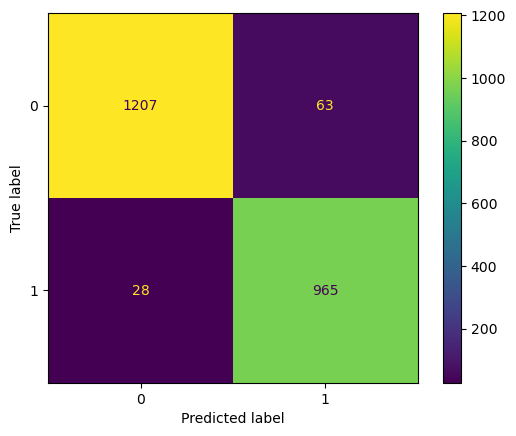


 ---------------------------------------------------------------------------------------------------- 

Performance Of SVC Mdoel in Test : 

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       513
           1       0.95      0.98      0.96       457

    accuracy                           0.97       970
   macro avg       0.97      0.97      0.97       970
weighted avg       0.97      0.97      0.97       970




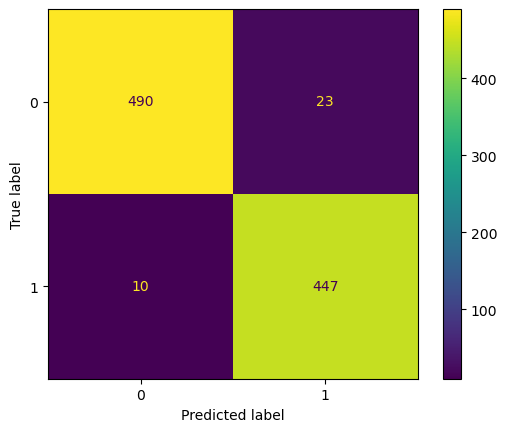

AUC = 0.9666419269666996

####################################################################################################
Performance Of AdaBoost Mdoel in Traning : 

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1270
           1       0.95      0.97      0.96       993

    accuracy                           0.97      2263
   macro avg       0.97      0.97      0.97      2263
weighted avg       0.97      0.97      0.97      2263




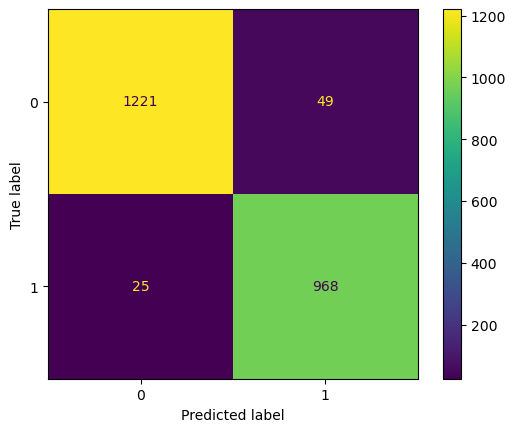


 ---------------------------------------------------------------------------------------------------- 

Performance Of AdaBoost Mdoel in Test : 

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       513
           1       0.95      0.97      0.96       457

    accuracy                           0.96       970
   macro avg       0.96      0.96      0.96       970
weighted avg       0.96      0.96      0.96       970




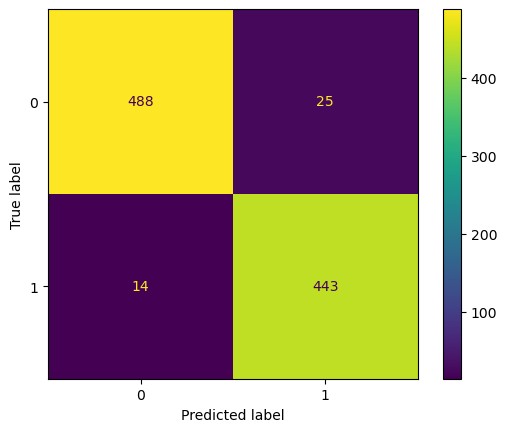

AUC = 0.9603162416130283

####################################################################################################


In [21]:
models = {
    'SVC': SVC(kernel = 'rbf', gamma = 0.01, C = 100),
    'AdaBoost': AdaBoostClassifier(n_estimators = 50, algorithm = 'SAMME.R')
}

results = pd.DataFrame(index = list(models), columns = ['Accuracy', 'AUC'])
for i in range(len(list(models))):
    # Get Model
    model = models[list(models)[i]]
    # Train Model
    model.fit(X_train, y_train)
    # Predict 
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Training
    print(f'Performance Of {list(models)[i]} Mdoel in Traning : ')
    print()
    print(classification_report(y_train, y_train_pred))
    print()
    confusion_matrix_train = confusion_matrix(y_train, y_train_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix_train)
    disp.plot()
    plt.show()
    print('\n','-'* 100, '\n')
    
    # Evaluate Training
    print(f'Performance Of {list(models)[i]} Mdoel in Test : ')
    print()
    print(classification_report(y_test, y_test_pred))
    print()
    confusion_matrix_test = confusion_matrix(y_test, y_test_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix_test)
    disp.plot()
    plt.show()
    
    # Save Accuracy And AUC
    accracy = accuracy_score(y_test, y_test_pred)
    auc = roc_auc_score(y_test, y_test_pred)
    results.loc[list(models)[i]] = [accracy, auc]
    print(f'AUC = {auc}')
    print()
    print('#' * 100)

<div style = 'background-color: #6482AD; text-align:center; padding: 10px; color:#F5EDED'>
    <h2>ROC Curve</h2>
</div>

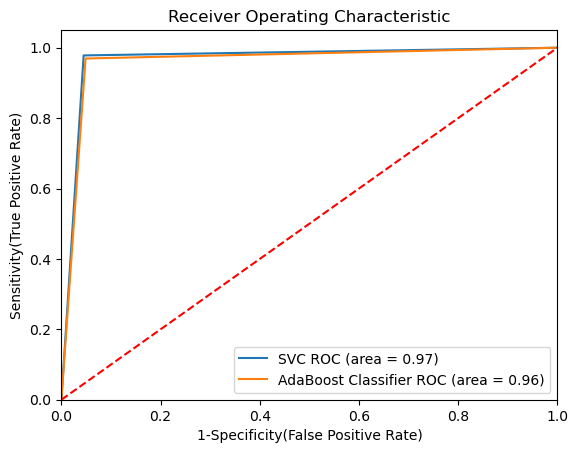

In [22]:
# lets plot roc auc curve 
auc_models = [
    {
        'label': 'SVC',
        'model': SVC(kernel = 'rbf', gamma = 0.01, C = 100),
        'auc': 0.966
    },
    
     {
        'label': 'AdaBoost Classifier',
        'model': AdaBoostClassifier(n_estimators = 50, algorithm = 'SAMME.R'),
        'auc': 0.960
    }
]

for algo in auc_models:
    model = algo['model'] # select the model
    model.fit(X_train, y_train) # train thme model

    # Compute False postive rate, and True positive rate
    fpr, tpr, threshold = roc_curve(y_test, model.predict(X_test))
    # Calculate Area under the curve to display on the plot
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (algo['label'], algo['auc']))

# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("auc.png")
plt.show() 